# *Population and World Cup Performance*

# 1. List of Teams in 2018 World Cup

## 1. Importing Libraries

In [1]:
import json
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

## 2 Getting the data

Loading the **world cup data**

In [2]:
with open("dataset/worldcup.json", encoding="utf8") as f:
    world_cup_data = json.load(f)
    
# Check that the overall data

assert type(world_cup_data) == dict

assert list(world_cup_data.keys()) == ['name', 'rounds']

Loading the **population data**

In [3]:
with open("dataset/population_csv.csv") as f:
    reader = csv.DictReader(f)
    population_data = list(reader)

# Check if the type population data is a list
assert type(population_data) == list

# Check if the type of first entry of population data is a dict
assert type(population_data[0]) == dict

## 3. Extracting Rounds

In [4]:
rounds = world_cup_data['rounds']

print("type(rounds): ", type(rounds))
print("len(rounds): ", len(rounds))
print("len(rounds[3]): ", len(rounds[3]))
print("round[3]")
rounds[3]

type(rounds):  <class 'list'>
len(rounds):  20
len(rounds[3]):  2
round[3]


{'name': 'Matchday 4',
 'matches': [{'num': 9,
   'date': '2018-06-17',
   'time': '21:00',
   'team1': {'name': 'Brazil', 'code': 'BRA'},
   'team2': {'name': 'Switzerland', 'code': 'SUI'},
   'score1': 1,
   'score2': 1,
   'score1i': 1,
   'score2i': 0,
   'goals1': [{'name': 'Coutinho', 'minute': 20, 'score1': 1, 'score2': 0}],
   'goals2': [{'name': 'Zuber', 'minute': 50, 'score1': 1, 'score2': 1}],
   'group': 'Group E',
   'stadium': {'key': 'rostov', 'name': 'Rostov Arena'},
   'city': 'Rostov-on-Don',
   'timezone': 'UTC+3'},
  {'num': 10,
   'date': '2018-06-17',
   'time': '16:00',
   'team1': {'name': 'Costa Rica', 'code': 'CRC'},
   'team2': {'name': 'Serbia', 'code': 'SRB'},
   'score1': 0,
   'score2': 1,
   'score1i': 0,
   'score2i': 0,
   'goals1': [],
   'goals2': [{'name': 'Kolarov', 'minute': 56, 'score1': 0, 'score2': 1}],
   'group': 'Group E',
   'stadium': {'key': 'samara', 'name': 'Samara Arena'},
   'city': 'Samara',
   'timezone': 'UTC+4'},
  {'num': 11,
   

In [5]:
# Extract the matches from each round. Once extracted, append the match one by one.

matches = []

for index, round_ in enumerate(rounds):
    # Extract the information about the match from each round
    round_matches = [match for match in round_['matches']]
    
    
    # Add the round matches to the matches
    for match in round_matches:
        matches.append(match)
    
matches[0]   


{'num': 1,
 'date': '2018-06-14',
 'time': '18:00',
 'team1': {'name': 'Russia', 'code': 'RUS'},
 'team2': {'name': 'Saudi Arabia', 'code': 'KSA'},
 'score1': 5,
 'score2': 0,
 'score1i': 2,
 'score2i': 0,
 'goals1': [{'name': 'Gazinsky', 'minute': 12, 'score1': 1, 'score2': 0},
  {'name': 'Cheryshev', 'minute': 43, 'score1': 2, 'score2': 0},
  {'name': 'Dzyuba', 'minute': 71, 'score1': 3, 'score2': 0},
  {'name': 'Cheryshev', 'minute': 90, 'offset': 1, 'score1': 4, 'score2': 0},
  {'name': 'Golovin', 'minute': 90, 'offset': 4, 'score1': 5, 'score2': 0}],
 'goals2': [],
 'group': 'Group A',
 'stadium': {'key': 'luzhniki', 'name': 'Luzhniki Stadium'},
 'city': 'Moscow',
 'timezone': 'UTC+3'}

There should be 64 matches.

If the length is 20, that means you have a list of lists instead of list of dictionaries

In [6]:
# Ensure that the length of matches is 64
assert len(matches) == 64

# Ensure that the type of matches is dictionary
assert type(matches[0]) == dict

## 4. Extracting Teams

In [7]:
# Initialise the team set
teams_list = []

# Appending the names of team 1 and team 2 by looping through match item
for match in matches:
    teams_list.append(match["team1"]['name'])
    teams_list.append(match["team2"]['name'])

# Get the unique value of team name
teams_set = set(teams_list)

# Sort the list of the team name alphabetically
teams = sorted(list(teams_set))
print(teams)

['Argentina', 'Australia', 'Belgium', 'Brazil', 'Colombia', 'Costa Rica', 'Croatia', 'Denmark', 'Egypt', 'England', 'France', 'Germany', 'Iceland', 'Iran', 'Japan', 'Mexico', 'Morocco', 'Nigeria', 'Panama', 'Peru', 'Poland', 'Portugal', 'Russia', 'Saudi Arabia', 'Senegal', 'Serbia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Tunisia', 'Uruguay']


Make sure the 'assert's pass before moving on to the next step

In [8]:
# Teams should be a list, not a set
assert type(teams) == list

# 43 teams competed in the 2018 world cup
assert len(teams) == 32

# Ensure each element of teams is a string
# (the name is not a dictionary)

assert type(teams[0]) == str

# 2. Associating Countries with 2018 World Cup Performance

In [9]:
combined_data = {}


population_data_2018 = []
for pop in population_data:
    if pop['Year'] == '2018':
        population_data_2018.append(pop)

for team in teams:
    combined_data[team] = {"wins": 0}
    

Check if the configuration is correct by using assert statement

In [10]:
# Combined_data should be a dictionary
assert type(combined_data) == dict

# The Keys should be a strings
assert type(list(combined_data.keys())[0]) == str

# the values should be dictionaries
assert combined_data['Japan'] == {"wins":0}

In [11]:
def find_winner(match):
    """
    Given a dictionary containing information about a match,
    return the name of the winner (or None in the case of a tie)
    """
    winner = None
    
    if match['score1'] > match['score2']:
        winner = match['team1']["name"]
    elif match['score1'] < match['score2']:
        winner = match['team2']["name"]
    return winner   

Use the assert function to see the function works properly

In [12]:
assert find_winner(matches[0]) == "Russia"
assert find_winner(matches[1]) == "Uruguay"
assert find_winner(matches[2]) == None

In [13]:
for match in matches:
    # get the name of the winner
    winner = find_winner(match)
    # Only proceed to the next step if there was
    # a winner
    if winner:
        # Add 1 to the associated coubt of wins
        combined_data[winner.lower().title()]['wins'] += 1

print(combined_data)
        

{'Argentina': {'wins': 1}, 'Australia': {'wins': 0}, 'Belgium': {'wins': 6}, 'Brazil': {'wins': 3}, 'Colombia': {'wins': 2}, 'Costa Rica': {'wins': 0}, 'Croatia': {'wins': 3}, 'Denmark': {'wins': 1}, 'Egypt': {'wins': 0}, 'England': {'wins': 3}, 'France': {'wins': 6}, 'Germany': {'wins': 1}, 'Iceland': {'wins': 0}, 'Iran': {'wins': 1}, 'Japan': {'wins': 1}, 'Mexico': {'wins': 2}, 'Morocco': {'wins': 0}, 'Nigeria': {'wins': 1}, 'Panama': {'wins': 0}, 'Peru': {'wins': 1}, 'Poland': {'wins': 1}, 'Portugal': {'wins': 1}, 'Russia': {'wins': 2}, 'Saudi Arabia': {'wins': 1}, 'Senegal': {'wins': 1}, 'Serbia': {'wins': 1}, 'South Korea': {'wins': 1}, 'Spain': {'wins': 1}, 'Sweden': {'wins': 3}, 'Switzerland': {'wins': 1}, 'Tunisia': {'wins': 1}, 'Uruguay': {'wins': 4}}


### Analysis of Wins

In [14]:
wins = [val["wins"] for val in combined_data.values()]

print("Mean number of wins: ", np.mean(wins))
print("Median number of wins: ", np.median(wins))
print("Standard deviation of number of wins: ", np.std(wins))

Mean number of wins:  1.5625
Median number of wins:  1.0
Standard deviation of number of wins:  1.5194057226429023


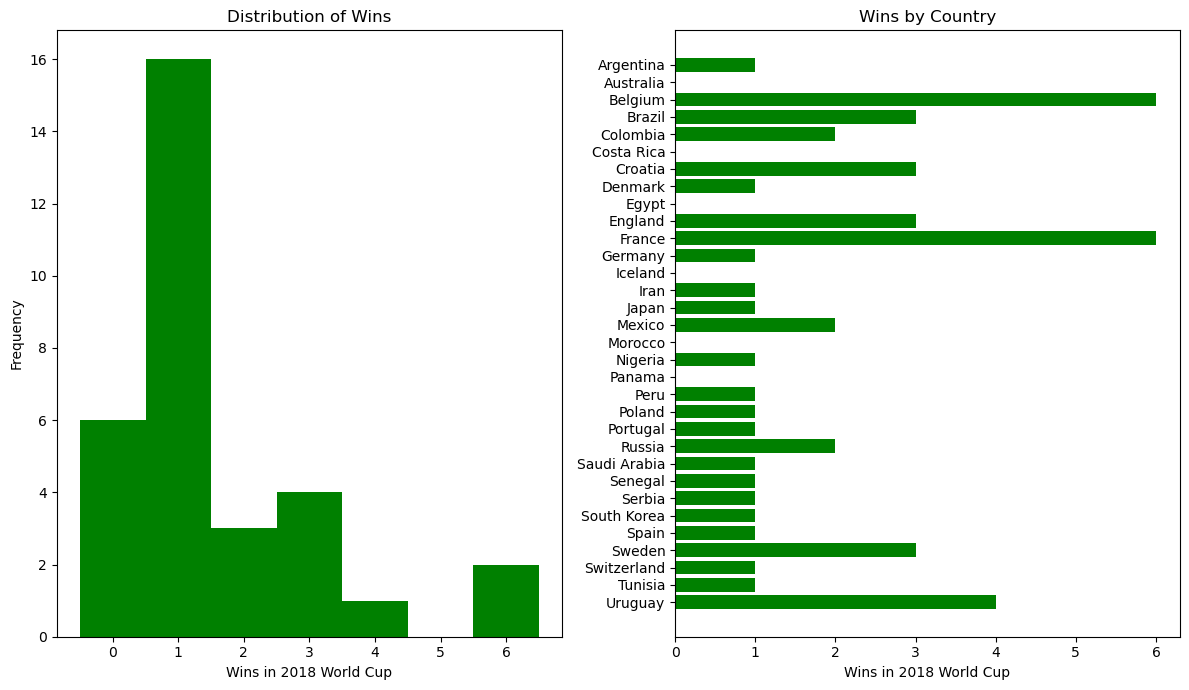

In [15]:
# Set up figure and axes
fig, (ax1,ax2) = plt.subplots(ncols= 2, figsize = (12, 7))
fig.set_tight_layout(True)

# Histogram of Wins and Frequencues
ax1.hist(x = wins, bins = range(8), align = "left", color = "green")
ax1.set_xticks(range(7))
ax1.set_xlabel("Wins in 2018 World Cup")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Wins")

# Horizontal Bar Graph of Wins by Country
ax2.barh(teams[::-1], wins[::-1], color = "green")
ax2.set_xlabel("Wins in 2018 World Cup")
ax2.set_title("Wins by Country");

Analysis: based on the insights from above, Belgium and France won on the finals. Additionally, they have won 6 six times

# 3. Associating Countries with 2018 Population

In [16]:
# Length of the population data
len(population_data)

15409

Choosing the 10 samples of the 'population data'

In [17]:
np.random.seed(42)
population_record_samples = np.random.choice(population_data, size = 10)
print(population_record_samples);

[{'Country Name': 'Greenland', 'Country Code': 'GRL', 'Year': '1980', 'Value': '50200'}
 {'Country Name': 'High income', 'Country Code': 'HIC', 'Year': '1994', 'Value': '1034461319'}
 {'Country Name': 'Congo, Rep.', 'Country Code': 'COG', 'Year': '1981', 'Value': '1830632'}
 {'Country Name': 'St. Lucia', 'Country Code': 'LCA', 'Year': '2004', 'Value': '161816'}
 {'Country Name': 'China', 'Country Code': 'CHN', 'Year': '2018', 'Value': '1392730000'}
 {'Country Name': 'Poland', 'Country Code': 'POL', 'Year': '2016', 'Value': '37970087'}
 {'Country Name': 'North Macedonia', 'Country Code': 'MKD', 'Year': '1985', 'Value': '1981534'}
 {'Country Name': 'Cyprus', 'Country Code': 'CYP', 'Year': '1971', 'Value': '620859'}
 {'Country Name': 'Equatorial Guinea', 'Country Code': 'GNQ', 'Year': '1971', 'Value': '298846'}
 {'Country Name': 'Euro area', 'Country Code': 'EMU', 'Year': '2013', 'Value': '337302113'}]


In [18]:
population_data_filtered = []
_2018_count = 0
for record in population_data:
    # Add record to population_data_filtered if relevant
    if record['Year'] == "2018" and record['Country Name'] in teams_list:
        population_data_filtered.append(record)

len(population_data_filtered)

27

In [19]:
population_data_filtered

[{'Country Name': 'Argentina',
  'Country Code': 'ARG',
  'Year': '2018',
  'Value': '44494502'},
 {'Country Name': 'Australia',
  'Country Code': 'AUS',
  'Year': '2018',
  'Value': '24982688'},
 {'Country Name': 'Belgium',
  'Country Code': 'BEL',
  'Year': '2018',
  'Value': '11433256'},
 {'Country Name': 'Brazil',
  'Country Code': 'BRA',
  'Year': '2018',
  'Value': '209469333'},
 {'Country Name': 'Colombia',
  'Country Code': 'COL',
  'Year': '2018',
  'Value': '49648685'},
 {'Country Name': 'Costa Rica',
  'Country Code': 'CRI',
  'Year': '2018',
  'Value': '4999441'},
 {'Country Name': 'Croatia',
  'Country Code': 'HRV',
  'Year': '2018',
  'Value': '4087843'},
 {'Country Name': 'Denmark',
  'Country Code': 'DNK',
  'Year': '2018',
  'Value': '5793636'},
 {'Country Name': 'France',
  'Country Code': 'FRA',
  'Year': '2018',
  'Value': '66977107'},
 {'Country Name': 'Germany',
  'Country Code': 'DEU',
  'Year': '2018',
  'Value': '82905782'},
 {'Country Name': 'Iceland',
  'Coun

Double check the population data samples again, especially the third one:

In [20]:
population_record_samples[2]

{'Country Name': 'Congo, Rep.',
 'Country Code': 'COG',
 'Year': '1981',
 'Value': '1830632'}

In [21]:
teams[13]

'Iran'

Normalise the locations in population data:

In [22]:
def normalize_location(country_name):
    
    """
    Given a country name, return the name that the
    country uses when playing in the FIFA World Cup
    """
    
    name_sub_dict = {
        "Russian Federation": "Russia",
        "Egypt, Arab Rep.": "Egypt",
        "Iran, Islamic Rep.": "Iran",
        "Korea, Rep.": "South Korea",
        "United Kingdom": "England"
    }
    
    # The .get method return the corresponding value from
    # the dict if present, otherwise returns country_name
    return name_sub_dict.get(country_name, country_name)

print(normalize_location("Russian Federation"))
print(normalize_location("Argentina"))
print(normalize_location("Korea, Rep."))

Russia
Argentina
South Korea


In [23]:
# Replace None with appropriate code

population_data_filtered = []

for record in population_data:
    # Get normalized country name
    country = normalize_location(record["Country Name"])
    record["Country Name"] = country
    # Add record to population_data_filtered if relevant
    if record["Year"] == "2018" and record["Country Name"] in teams_list:
        # Replace the country name in the record
        record["Country Name"] = country
        # Append to list
        population_data_filtered.append(record)

len(population_data_filtered) # 32

32

In [24]:
# Replace None with appropriate code
for record in population_data_filtered:
    # Extract the country name from the record
    country = record["Country Name"]
    # Extract the population value from the record
    population = int(record["Value"])
    # Add this information to combined_data
    combined_data[country]["population"] = population

# Look combined_data
combined_data

{'Argentina': {'wins': 1, 'population': 44494502},
 'Australia': {'wins': 0, 'population': 24982688},
 'Belgium': {'wins': 6, 'population': 11433256},
 'Brazil': {'wins': 3, 'population': 209469333},
 'Colombia': {'wins': 2, 'population': 49648685},
 'Costa Rica': {'wins': 0, 'population': 4999441},
 'Croatia': {'wins': 3, 'population': 4087843},
 'Denmark': {'wins': 1, 'population': 5793636},
 'Egypt': {'wins': 0, 'population': 98423595},
 'England': {'wins': 3, 'population': 66460344},
 'France': {'wins': 6, 'population': 66977107},
 'Germany': {'wins': 1, 'population': 82905782},
 'Iceland': {'wins': 0, 'population': 352721},
 'Iran': {'wins': 1, 'population': 81800269},
 'Japan': {'wins': 1, 'population': 126529100},
 'Mexico': {'wins': 2, 'population': 126190788},
 'Morocco': {'wins': 0, 'population': 36029138},
 'Nigeria': {'wins': 1, 'population': 195874740},
 'Panama': {'wins': 0, 'population': 4176873},
 'Peru': {'wins': 1, 'population': 31989256},
 'Poland': {'wins': 1, 'popu

Check that they types are correct with these assert statements

In [25]:
assert type(combined_data["Uruguay"]) == dict
assert type(combined_data["Uruguay"]["population"]) == int

In [26]:
combined_data

{'Argentina': {'wins': 1, 'population': 44494502},
 'Australia': {'wins': 0, 'population': 24982688},
 'Belgium': {'wins': 6, 'population': 11433256},
 'Brazil': {'wins': 3, 'population': 209469333},
 'Colombia': {'wins': 2, 'population': 49648685},
 'Costa Rica': {'wins': 0, 'population': 4999441},
 'Croatia': {'wins': 3, 'population': 4087843},
 'Denmark': {'wins': 1, 'population': 5793636},
 'Egypt': {'wins': 0, 'population': 98423595},
 'England': {'wins': 3, 'population': 66460344},
 'France': {'wins': 6, 'population': 66977107},
 'Germany': {'wins': 1, 'population': 82905782},
 'Iceland': {'wins': 0, 'population': 352721},
 'Iran': {'wins': 1, 'population': 81800269},
 'Japan': {'wins': 1, 'population': 126529100},
 'Mexico': {'wins': 2, 'population': 126190788},
 'Morocco': {'wins': 0, 'population': 36029138},
 'Nigeria': {'wins': 1, 'population': 195874740},
 'Panama': {'wins': 0, 'population': 4176873},
 'Peru': {'wins': 1, 'population': 31989256},
 'Poland': {'wins': 1, 'popu

### Analytical of Population

Statistical Analysis of Population

In [27]:
populations = [val["population"] for val in combined_data.values()]

print("Mean of population: ", np.mean(populations))
print("Median population: ", np.median(populations))
print("Standard deviation of population:", np.std(populations))

Mean of population:  51687460.84375
Median population:  34864542.5
Standard deviation of population: 55195121.60871871


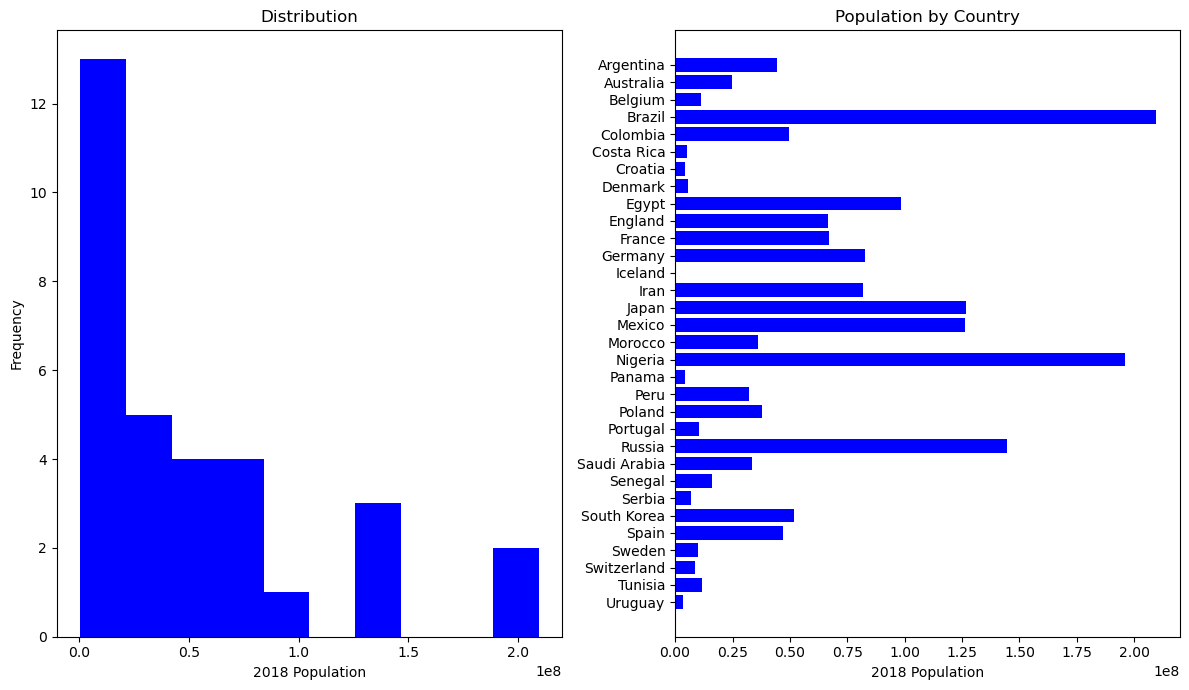

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,7))
fig.set_tight_layout(True)

ax1.hist(x = populations, color = "blue")
ax1.set_xlabel("2018 Population")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution")

ax2.barh(teams[::-1], populations[::-1], color = "blue")
ax2.set_xlabel("2018 Population")
ax2.set_title("Population by Country");

# 4. Analysis of Population vs Performance

In [29]:
np.corrcoef(wins, populations)[0][1]


# The correlation is a positive. However, it is a weak correlation it is very close to 0. 
# Therefore, the population of each country does not necessarily impact the performance of the player or 
# chance of winning the cup

0.07592816849178588

In the cell below, interpret this number. What direction is this correlation? Is it strong or weak?

In [30]:
'''
The correlation is a positive. However, it is a weak correlation it is very close to 0. 
Therefore, the population of each country does not necessarily impact the performance of the player or 
chance of winning the cup. In other words. there is NO relationship between the population and the number of
wins.
''';

### Data Visualisation

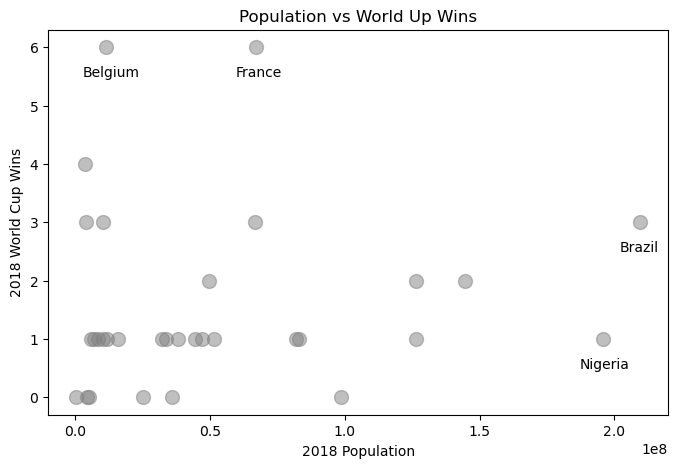

In [31]:
# Set up figure
fig, ax = plt.subplots(figsize = (8,5))

ax.scatter(
    x = populations,
    y = wins,
    color = "gray", alpha = 0.5, s = 100
)

ax.set_xlabel("2018 Population")
ax.set_ylabel("2018 World Cup Wins")
ax.set_title("Population vs World Up Wins")

highlighted_points = {
    "Belgium" : 2,
    "Brazil" : 3,
    "France" : 10,
    "Nigeria" : 17
    
}

for country, index in highlighted_points.items():
    # Get x and y of data input
    x = populations[index]
    y = wins[index]
    # Move each point slightly down and to the left
    # (Numbers were chosen by manually tweaking(
    xtext = x - (1.25e6 * len(country))
    ytext = y - 0.5
    # Annotate relevant arguments
    ax.annotate(
        text = country,
        xy = (x,y),
        xytext = (xtext, ytext),
    )

Data Visualization Interpretation


Interpret this plot in the cell below. Does this align with the findings from the statistical measure (correlation), as well as the map shown at the beginning of this lab (showing the best results by country)?

In [32]:
"""
From seeing the graph above, it is a very weak correlation and there is no relationship 
between the country population and winning the cup. For example, Brazil and Nigeria have
very big number of their country population but they won a very few numbers of game in 
the cup whereas country with fewer numbers of populations like France and Belgium have won 6
games in the cup. Therefore, countries with higher population will unlikely to win on the future
world cup.
""";

**Final Analysis**

* What is the relationship between the population of a country and their performance in the 2018 FIFA World Cup?

Overall, we found a very weakly positive relationship between the population of a country and their performance in the 2018 FIFA World Cup, as demonstrated by both the correlation between populations and wins, and the scatter plot.

In the cell below, write down your thoughts on these questions:

* What are your thoughts on why you may see this result?
* What would you research next?

In [33]:
"""
The results imply that there is no relationship between country population and number of wins in the world cup 2018.
A lot of people assumed that countries with higher population have the chance of winning the cup which is a wrong assumption. 
Therefore, countries like Nigeria and Brazil with higher populations are highly unlikely to win the
future world cups.

My next research would be find the relationship between number of wins and the player attributes by correlating
* between age and overall rating
* between age and potential
* between wins and average dribbling speed
""";